## Example Analysis

This notebook contains some examples for analysing cosmic ray data that has been saved and converted to 'pickle' format.

The first cell below shows how to open a file, extract the events, and count the total number of events.

In [1]:
import pickle

import sys
sys.path.append("../analysis")
from event import Event, Pulse

fname = 'sample.pkl'

ifile = open(fname, 'rb')
events= pickle.load(ifile, encoding='latin1')
n_events= len(events)

print("Read {} events from file".format(n_events))

Read 13741 events from file


Next is an example of a very simple event loop, which counts the number of rising edge pulses (strictly, transitions) on each channel.  The first loop is over the events in the file, the second loop is over the pulses in an event.  If a pulse is a rising edge, then the code increments an element of count, corresponding to the channel number.

In [2]:
# example event loop
count = [0, 0, 0, 0]  # counts per channel

for event in events:
    for pulse in event.pulses:
        # only count rising edges
        if pulse.edge == 0:
            count[pulse.chan] += 1

print("Counts by channel")
print("Channel 0 : {} ".format(count[0]))
print("Channel 1 : {} ".format(count[1]))
print("Channel 2 : {} ".format(count[2]))
print("Channel 3 : {} ".format(count[3]))

Counts by channel
Channel 0 : 8151 
Channel 1 : 6986 
Channel 2 : 9816 
Channel 3 : 6831 


The next cell shows a method for counting coincidences between channels.  Note the additional variables in the event loop, which allow us to calculate summary information about each event.  After looping over the pulses in an event, found0 and found1 are True if rising edge pulses have been found on channels 0 and 1 respectively.

In [3]:
n_coinc = 0
for event in events:
    found0 = False
    found1 = False
    for pulse in event.pulses:
        # only count rising edges
        if pulse.edge==0 and pulse.chan == 0:
            found0 = True
        if pulse.edge==0 and pulse.chan == 1:
            found1 = True
    if found0 and found1:
        n_coinc += 1
            
print("N (0,1) coincidences : {}".format(n_coinc))

N (0,1) coincidences : 5716


The final cell has an example for extracting time information from the pulses.  Two additional "event" variables are computed in the loop over pulses; time0 and time1, which are used to store the time of a rising-edge pulse on channels 0 and 1 - if such pulses are found.  If a coincidence between channels 0 and 1 is found, the difference in time is stored, and then plotted in a histogram.  Finally, some summary information about the distribution of delta-T values is printed.

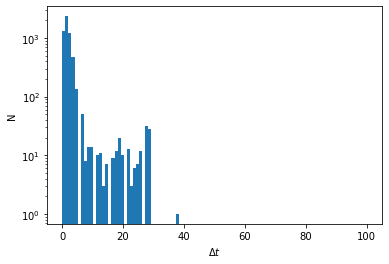

Mean delta-t : 2.280003498950315
Std dev delta-t : 3.969166488093526


In [5]:
import numpy as np
import matplotlib.pyplot as plt

dts = []
for event in events:
    found0 = False
    found1 = False
    time0 = 0.
    time1 = 0.
    for pulse in event.pulses:
        # only count rising edges
        if pulse.edge==0 and pulse.chan == 0:
            found0 = True
            time0 = pulse.time
        if pulse.edge==0 and pulse.chan == 1:
            found1 = True
            time1 = pulse.time
    if found0 and found1:
        dts.append(abs(time1-time0))

bins = np.linspace(0.,100., 100)
plt.hist(dts, bins)
plt.yscale('log')
plt.ylabel("N")
plt.xlabel(r'$\Delta t$')
plt.show()

print("Mean delta-t : {}".format(np.mean(dts)))
print("Std dev delta-t : {}".format(np.std(dts)))